In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
data=pd.read_csv("/content/Dataset .csv")
df=pd.DataFrame(data)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [42]:
split = df['Cuisines'].str.split(',').explode()
common_cuisine_combinations =split.value_counts()
common_cuisine_combinations.head(10)


,count
Cuisines,
North Indian,2992
Chinese,1880
Fast Food,1314
North Indian,968
Chinese,855
Mughlai,780
Fast Food,672
Bakery,621
Cafe,617


In [43]:
cuisines_split = df['Cuisines'].str.split(',').explode()
cuisine_ratings_df = pd.DataFrame({'Cuisine Combination':split, 'Aggregate Rating': df['Aggregate rating']})
cuisine_ratings_df = cuisine_ratings_df.dropna()
average_ratings_by_cuisine = cuisine_ratings_df.groupby('Cuisine Combination')['Aggregate Rating'].mean()
top_high_rated_cuisines = average_ratings_by_cuisine.nlargest()
top_high_rated_cuisines

,Aggregate Rating
Cuisine Combination,
Sunda,4.900000
B�_rek,4.700000
Cajun,4.700000
Scottish,4.700000
Caribbean,4.666667


<ipython-input-44-6ee79470f545>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cuisine', y='Aggregate Rating', data=top_cuisine_data, palette='Set3')


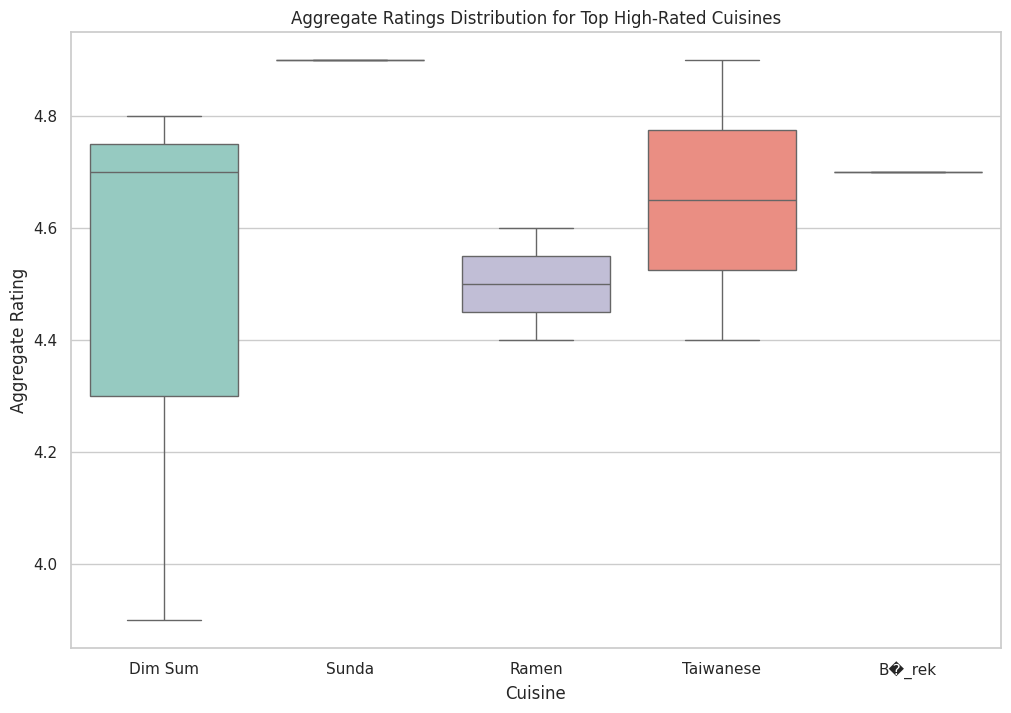

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Split cuisines into individual rows and pair with corresponding ratings
cuisines_split = df['Cuisines'].str.split(',').explode().str.strip()  # Split and trim whitespace
cuisine_ratings_df = pd.DataFrame({'Cuisine': cuisines_split, 'Aggregate Rating': df['Aggregate rating']}).dropna()

# Calculate average ratings by cuisine and select the top-rated cuisines
average_ratings_by_cuisine = cuisine_ratings_df.groupby('Cuisine')['Aggregate Rating'].mean()
top_high_rated_cuisines = average_ratings_by_cuisine.nlargest(5).index  # Get the top 5 high-rated cuisines

# Filter the data for these top cuisines
top_cuisine_data = cuisine_ratings_df[cuisine_ratings_df['Cuisine'].isin(top_high_rated_cuisines)]

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cuisine', y='Aggregate Rating', data=top_cuisine_data, palette='Set3')

# Set plot title and labels
plt.title('Aggregate Ratings Distribution for Top High-Rated Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Aggregate Rating')

# Show the plot
plt.show()
